In [17]:
import pandas as pd
# Read the CSV file
Data = pd.read_csv(".\Dataset-Mental-Disorders-Clean.csv")
features = list(Data.columns)
print(f"features: {features}")

patient_number = Data.iloc[:,0]
Dataset = Data.iloc[:,1:-1]
print(f"x: {list(Dataset.columns)}")
y = Data.iloc[:,-1]
print(f"y: {y.name}")

import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

features: ['Patient Number', 'Sadness', 'Euphoric', 'Exhausted', 'Sleep dissorder', 'Mood Swing', 'Suicidal thoughts', 'Anorxia', 'Authority Respect', 'Try-Explanation', 'Aggressive Response', 'Ignore & Move-On', 'Nervous Break-down', 'Admit Mistakes', 'Overthinking', 'Sexual Activity', 'Concentration', 'Optimisim', 'Expert Diagnose']
x: ['Sadness', 'Euphoric', 'Exhausted', 'Sleep dissorder', 'Mood Swing', 'Suicidal thoughts', 'Anorxia', 'Authority Respect', 'Try-Explanation', 'Aggressive Response', 'Ignore & Move-On', 'Nervous Break-down', 'Admit Mistakes', 'Overthinking', 'Sexual Activity', 'Concentration', 'Optimisim']
y: Expert Diagnose


In [18]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

X_train, X_test, y_train, y_test = train_test_split(Dataset, y, test_size=0.33, random_state=33)

Creation of a simple Neural Network Multi class classifier

In [19]:
from sklearn.preprocessing import OneHotEncoder
# Initialize OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)  # `sparse=False` returns dense array

# Perform one-hot encoding
y_test_hot = encoder.fit_transform(y_test.to_numpy().reshape(-1, 1))
y_train_hot = encoder.fit_transform(y_train.to_numpy(dtype='int').reshape(-1, 1))
# print(y_test.to_numpy())
# print(y_test_hot)

In [20]:
# y_test_hot = pd.get_dummies(y_test).to_numpy(dtype='int')
# y_train_hot = pd.get_dummies(y_train).to_numpy(dtype='int')
# print(y_test.to_numpy())
# print(y_test_hot)

In [21]:
## NN
import tensorflow as tf
from tensorflow import keras
from keras import Model
# from keras.models import Sequential
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
# from tensorflow.keras.layers import Conv2D
# from tensorflow.keras.layers import Reshape
# from tensorflow.keras.layers import Conv2DTranspose
# from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import Adam, SGD

l1 = 64
activation = 'relu'
alpha = 0.05
epochs = 15
# define model
print(f"Dataset.shape[1]: {Dataset.shape[1]}") # input features shape
print(f"y.shape[1]: {y_test_hot.shape[1]}") # output vector shape
print(f"Dataset.shape[0]: {Dataset.shape[0]}") # input features shape
inputs = Input(shape=(Dataset.shape[1],))
hidden1 = Dense(l1, activation=activation)(inputs)
hidden2 = Dense(l1, activation=activation)(hidden1)
predictions = Dense(y_train_hot.shape[1], activation="softmax")(hidden2)

model = Model(inputs=inputs, outputs=predictions)
model.summary()

## compile model with mse loss and ADAM optimizer (uncomment for SGD)
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=alpha), metrics=['accuracy'])


Dataset.shape[1]: 17
y.shape[1]: 4
Dataset.shape[0]: 120


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 17)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,572 (21.77 KB)

 Trainable params: 5,572 (21.77 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
history = model.fit(x=X_train, y=y_train_hot, epochs=epochs, verbose=1, batch_size=32)#, callbacks=[loss_callback])

Epoch 1/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 0s/step - accuracy: 0.3484 - loss: 2.5737
Epoch 2/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4086 - loss: 1.9097 
Epoch 3/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3727 - loss: 1.3557 
Epoch 4/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4297 - loss: 1.1942 
Epoch 5/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - accuracy: 0.5711 - loss: 0.9974  
Epoch 6/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7383 - loss: 0.8428 
Epoch 7/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - accuracy: 0.8102 - loss: 0.5836  
Epoch 8/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7563 - loss: 0.5754 
Epoch 9/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8477 - loss: 0.4709 
Epoch 10/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8094 - loss: 0.5259 
Epoch 11/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8687 - loss: 0.3606 
Epoch 12/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - accuracy: 0.8633 - loss: 0.3139  
Epo

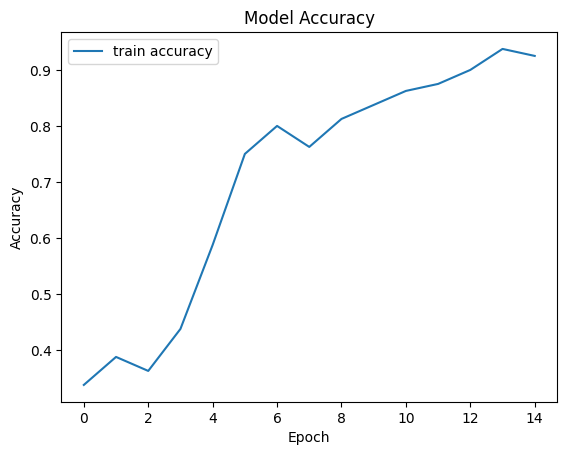

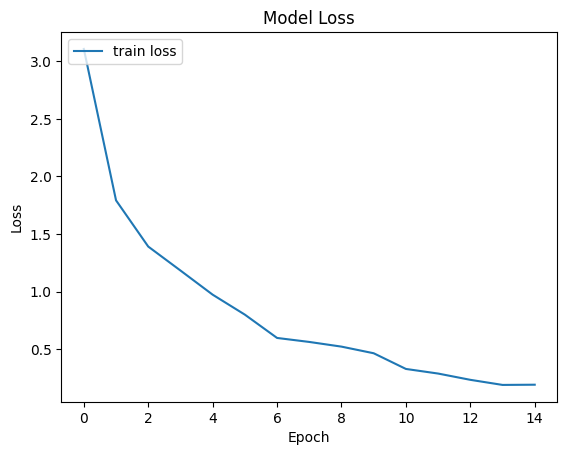

In [23]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'], label='train accuracy')
# plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'], label='train loss')
# plt.plot(history.history['val_loss'], label='val loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

In [24]:
y_pred = model.predict(X_test)
max_indices = np.argmax(y_pred, axis=1) #prediction as class number
NN_pred = np.zeros_like(y_pred)
NN_pred[np.arange(y_pred.shape[0]), max_indices] = 1 #prediction as one hot


# Create the confusion matrix
nn_cm = confusion_matrix(y_test, max_indices)
accuracy = accuracy_score(y_test, max_indices)
precision = precision_score(y_test, max_indices, average='macro')
recall = recall_score(y_test, max_indices, average='macro')
f1 = f1_score(y_test, max_indices, average='macro')

print(nn_cm)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/stepWARNING:tensorflow:6 out of the last 6 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x00000212F806D5E0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
[[ 7  1  0  0]
 [ 0 11  1  0]
 [ 0  0 10  0]
 [ 0  0  0 10]]
Accuracy: 0.95
Precision: 0.9564393939393939
Recall: 0.9479166666666666
F1 Score: 0.950595238095238
